In [2]:
import numpy as np
import matrixgen, prob_solvers
import standard_solvers as solvers
from scipy import stats, linalg, sparse
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def result_to_err(result, x_ast):
    if type(result) is list:
        return np.column_stack([result_to_err(r, x) for r, x in zip(result, x_ast.T)])
    return np.linalg.norm(result.iterations - x_ast[:,None], axis=0)

In [32]:
lamb = 10
N = 50
nugget = 0.0

x0 = np.zeros(N)
Sigma0 = np.eye(N)

In [47]:
U = matrixgen.diaconis_shahshahani(N)
evals = stats.gamma(a=0.5, scale=2).rvs(N)

In [48]:
x_ast = np.random.normal(size=(N, 20))

In [49]:
omega = 1./np.max(evals)
res_rich = []
res_jac = []
res_gs = []
for i in range(x_ast.shape[1]):
    A = U.dot(np.diag(evals).dot(U.T))
    # perturb A, just a little, to get something diagonally dominant
    A += nugget*np.eye(N)
    print(np.linalg.cond(A))
    b = A.dot(x_ast[:,i])
    res_rich.append(solvers.richardson(x0, A, b, 50, omega, detailed=True))
    res_jac.append(solvers.jacobi(x0, A, b, 50, detailed=True))
    res_gs.append(solvers.gauss_seidel(x0, A, b, 50, detailed=True))

5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163
5821.753289911163


In [50]:
omega = 1./np.max(evals)
res_rich_p = []
res_jac_p = []
res_gs_p = []
for i in range(x_ast.shape[1]):
    A = U.dot(np.diag(evals).dot(U.T))
    # perturb A, just a little, to get something diagonally dominant
    A += nugget*np.eye(N)
    b = A.dot(x_ast[:,i])
    res_rich_p.append(prob_solvers.richardson(x0, Sigma0, A, b, 50, omega, detailed=True))
    res_jac_p.append(prob_solvers.jacobi(x0, Sigma0, A, b, 50, detailed=True))
    res_gs_p.append(prob_solvers.gauss_seidel(x0, Sigma0, A, b, 50, detailed=True))

In [57]:
res_gs_p[0].covs[-1]

array([[-0.13676848, -0.07102993, -0.06459272, ..., -0.01765796,
        -0.01729478, -0.01694275],
       [ 0.11629572,  0.08436991,  0.05123275, ...,  0.02723272,
         0.02683054,  0.02643766],
       [-0.3120024 , -0.17076355, -0.12416808, ...,  0.00118845,
         0.00132549,  0.00146256],
       ...,
       [-0.0652688 , -0.08801568, -0.09761609, ..., -0.00275154,
        -0.00260657, -0.00247184],
       [-0.00812134, -0.02168031, -0.02602895, ..., -0.02540136,
        -0.02492187, -0.02445168],
       [ 0.52162081,  0.38954309,  0.31485138, ...,  0.0166456 ,
         0.01625645,  0.01588357]])

Text(0, 0.5, '$\\| x_* - x_m \\|$')

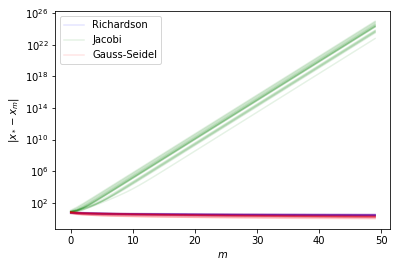

In [51]:
r = plt.semilogy(result_to_err(res_rich, x_ast), c='blue', alpha=0.1, label='Richardson')
j = plt.semilogy(result_to_err(res_jac, x_ast), c='green', alpha=0.1, label='Jacobi')
g = plt.semilogy(result_to_err(res_gs, x_ast), c='red', alpha=0.1, label='Gauss-Seidel')
plt.legend(loc='best', handles=[r[0], j[0], g[0]])
plt.xlabel('$m$')
plt.ylabel('$\| x_* - x_m \|$')

In [52]:
proj = np.random.normal(size=(N, 1))

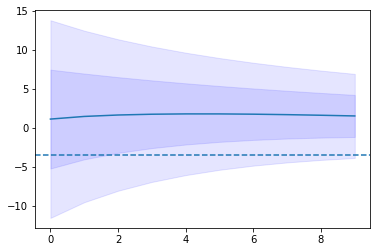

In [46]:
result = res_rich_p
res_ix = 0
n_samp = 10
x_proj = proj.T.dot(x_ast[:,res_ix])
plt.axhline(x_proj, linestyle='--')
mean_proj = proj.T @ result[res_ix].means[:,:n_samp]
mean_proj = mean_proj.ravel()
cov_proj = np.empty(n_samp)
for i in range(n_samp):
    cov_proj[i] = (proj.T @ result[res_ix].covs[:,:,i] @ proj).ravel()
    
plt.plot(mean_proj)
plt.fill_between(np.arange(n_samp), mean_proj + 2*np.sqrt(cov_proj), mean_proj - 2*np.sqrt(cov_proj), alpha=0.1, color='blue')
plt.fill_between(np.arange(n_samp), mean_proj + np.sqrt(cov_proj), mean_proj - np.sqrt(cov_proj), alpha=0.1, color='blue')
